In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib

In [3]:
df = pd.read_csv("final_website_stats.csv")

In [4]:
data = df.drop(columns=['timestamp'])

In [5]:
data = pd.get_dummies(data, columns=['day_of_week'], drop_first=True)

In [6]:
data.head()

,Unnamed: 0,page_views,ad_spend,is_weekend,is_holiday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,1165.962767,194.901425,True,True,False,True,False,False,False,False
1,1,1191.485835,175.852071,True,False,False,False,True,False,False,False
2,2,1266.928269,269.430656,False,False,True,False,False,False,False,False
3,3,1364.193858,295.690896,False,False,False,False,False,False,True,False
4,4,1013.282520,242.975399,False,False,False,False,False,False,False,True


In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [8]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [9]:
window_size = 30
X = []
y = []
target_col = 'page_views'
target_idx = scaled_df.columns.get_loc(target_col)

for i in range(len(scaled_df) - window_size):
    X.append(scaled_df.iloc[i:i+window_size].values)
    y.append(scaled_df.iloc[i+window_size, target_idx])

X = np.array(X)
y = np.array(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [11]:
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\HP\anaconda3\anaconda34\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,417 (126.63 KB)

 Trainable params: 32,417 (126.63 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0339 - val_loss: 0.0383
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0149 - val_loss: 0.0217
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0128 - val_loss: 0.0231
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0072 - val_loss: 0.0096
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - val_loss: 0.0092
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045 - val_loss: 0.0078
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0040 - val_loss: 0.0058
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042 - val_loss: 0.0064
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - val_loss: 0.0062
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

In [13]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [14]:
page_views_idx = data.columns.get_loc("page_views")
y_test_rescaled = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_test), scaled_df.shape[1]-1)), y_test.reshape(-1,1)], axis=1)
)[:,-1]

In [15]:
y_pred_rescaled = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred), scaled_df.shape[1]-1)), y_pred], axis=1)
)[:,-1]

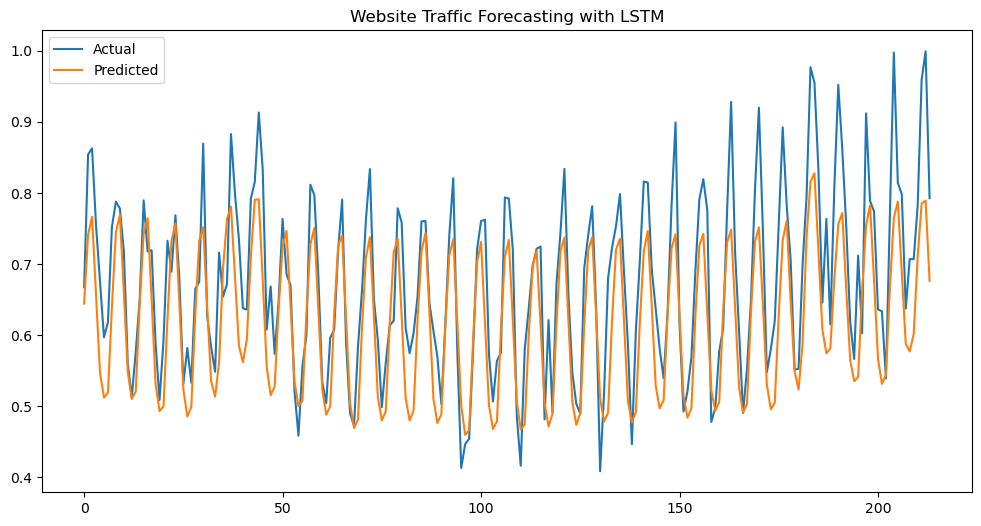

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.legend()
plt.title("Website Traffic Forecasting with LSTM")
plt.show()

In [ ]:
model.save("web_traffic_model.keras")
